In [10]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import glob
import seaborn as sns
import scipy

# error statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error

from lib.uranos import URANOS
from lib.funcs import *

In [3]:
path_to_outputs_dir = './uranos_files/uranos_den_rev2/outputs/'

In [5]:
U_cntl, U_cntl_hits = readUranosNC(path_to_outputs_dir,
                                   'control/',
                                   crns_x, crns_y)
U_0115, U_0115_hits = readUranosNC(path_to_outputs_dir,
                                   '0115/',
                                   crns_x, crns_y)
U_0121, U_0121_hits = readUranosNC(path_to_outputs_dir,
                                   '0121/',
                                   crns_x, crns_y)
U_0122, U_0122_hits = readUranosNC(path_to_outputs_dir,
                                   '0122/',
                                   crns_x, crns_y)
U_0129, U_0129_hits = readUranosNC(path_to_outputs_dir,
                                   '0129/',
                                   crns_x, crns_y)
U_0217, U_0217_hits = readUranosNC(path_to_outputs_dir,
                                   '0217/',
                                   crns_x, crns_y)
U_0218, U_0218_hits = readUranosNC(path_to_outputs_dir,
                                   '0218/',
                                   crns_x, crns_y)
U_0224, U_0224_hits = readUranosNC(path_to_outputs_dir,
                                   '0224/',
                                   crns_x, crns_y)
U_0304, U_0304_hits = readUranosNC(path_to_outputs_dir,
                                   '0304/',
                                   crns_x, crns_y)

In [6]:
nc_cntl = calcNeutronCounts(U_cntl_hits)
nc_0115 = calcNeutronCounts(U_0115_hits)
nc_0121 = calcNeutronCounts(U_0121_hits)
nc_0122 = calcNeutronCounts(U_0122_hits)
nc_0129 = calcNeutronCounts(U_0129_hits)
nc_0217 = calcNeutronCounts(U_0217_hits)
nc_0218 = calcNeutronCounts(U_0218_hits)
nc_0224 = calcNeutronCounts(U_0224_hits)
nc_0304 = calcNeutronCounts(U_0304_hits)

In [7]:
# CALC Hits SWEs
N_cal = nc_0115
N_raws = [nc_0121, nc_0122, nc_0129,
          nc_0217, nc_0218, nc_0224,
          nc_0304]

rho = 1.135988 - 0.05
theta_g = (.204)/rho

a0 = 0.0808
a1 = 0.3720
a2 = 0.1150

N_0 = N_cal / ((a0/(theta_g*rho+a2))+a1)

N_wat = 0.24*N_0
lamb = -4.8

Hits_swe_mod = lamb*np.log((N_raws-N_wat)/(N_cal-N_wat))
mod_errs = (4.8/(N_raws - N_wat))*np.sqrt(N_raws)


# swe_0115_mod = lamb*np.log((Hits_0115_nc-N_wat)/(N_cal-N_wat))
Hits_swe_mod

array([0.26178707, 0.27468265, 0.11560453, 0.57154786, 0.56331968,
       0.34788776, 0.44199311])

In [8]:
mod_errs

array([0.13186037, 0.13210807, 0.12909253, 0.13797382, 0.13780693,
       0.13352524, 0.13537491])

In [9]:
print('Snow Bulk Density: {}'.format(rho))
print('Gravimetric Water Content: {}'.format(theta_g))
print('Volumetric Water Content: {}'.format(theta_g*rho))

Snow Bulk Density: 1.085988
Gravimetric Water Content: 0.18784737952905556
Volumetric Water Content: 0.204


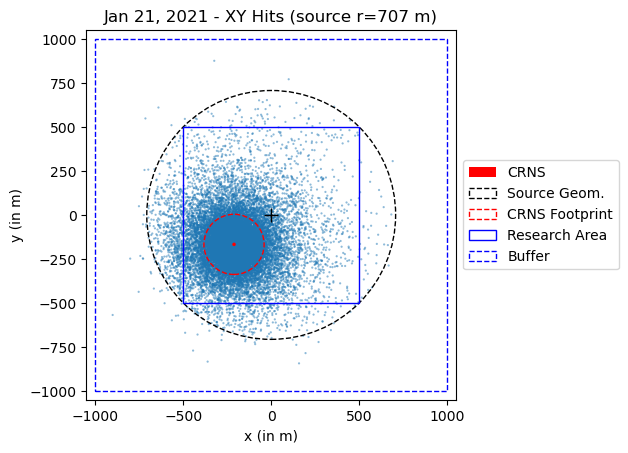

In [12]:
# figure []
fig, ax = plt.subplots()
U_0121.plot_xy_hits(ax = ax, footprint=False)
# ax.plot(crns_x, crns_y, 'r^', label='CRNS')
ax.set_aspect('equal', adjustable='box')
ax.axis([-1050,1050,-1050,1050])
ax.set_title('Jan 21, 2021 - XY Hits (source r=707 m)')

radius = 707
circle1 = plt.Circle((0, 0), radius, facecolor='none',
                     edgecolor='k', ls='--', label='Source Geom.')
circle2 = plt.Circle((crns_x, crns_y), 171, facecolor='none',
                     edgecolor='r', ls='--', label='CRNS Footprint')
crns = plt.Circle((crns_x, crns_y), 10, facecolor='r', label='CRNS')
ax.add_patch(crns)
ax.add_patch(circle1)
ax.add_patch(circle2)

rect1 = plt.Rectangle((-500,-500), 1000, 1000,
                      fill=False, edgecolor='b', label='Research Area')

rect2 = plt.Rectangle((-1000,-1000), 2000, 2000,
                      fill=False, ls='--', edgecolor='b', label='Buffer')
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

# plt.savefig('/Users/hkim139/Documents/research/03.manuscripts/Woodley_manuscript/final_figs_for_pub/f3.jpg',
#             bbox_inches='tight', facecolor='w', dpi=300)

In [ ]:
# from Sam's R file
# w_SWE_cm_lidar = np.array([0.6561156, 0.5134374, 0.4355656, 1.2046736, 1.2021830, 0.8783306, 0.7096806])
# swe_errs = np.array([0.3570049, 0.3091467, 0.2480307, 0.6591976, 0.7755622, 0.4091939, 0.1896618])

w_SWE_cm_lidar = pd.read_csv('./lidar_swe_weighted_minusJan15_hkim.csv')
swe_errs = pd.read_csv('./lidar_swe_weighted_minusJan15_RMSE_hkim.csv')

In [ ]:
crns_swe = np.array([0.23820851, 0.24565408, 0.19813903, 0.71068888, 0.79518261,
       0.4815256 , 0.32624489])
crns_swe_err = np.array([0.11128007,0.11099241,0.106561,0.11772323,0.12439718,0.11785627,0.11223322])

In [ ]:
# Figure 6
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(1, 2,
                      width_ratios=[1,1],
                      hspace=0.35,
                      wspace=0.25,
                      top=0.95, bottom=0.05, left=0.1, right=0.9)
ax1 = fig.add_subplot(gs[0])
ax1.set_aspect('equal', adjustable='box')
ax1.scatter(crns_swe, w_SWE_cm_lidar.to_numpy().reshape(-1),
            c=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
            zorder=2.5)
markers, caps, bars = ax1.errorbar(x=crns_swe, y=w_SWE_cm_lidar.to_numpy().reshape(-1), fmt='o',
                                   yerr=swe_errs.to_numpy().reshape(-1),
                                   xerr=crns_swe_err, mfc='w', alpha=0,
                                   ecolor='k', markeredgecolor='k', markeredgewidth=0.5)
[bar.set_alpha(0.4) for bar in bars]
ax1.plot(np.arange(-0.1,2.1,.1), np.arange(-0.1,2.1,.1), 'k--', alpha=0.5)
# texts = [ax1.text(crns_swe[i],
#                   w_SWE_cm_lidar.to_numpy()[i],
#                   s=txt,c='r', size=9) for i, txt in enumerate(['1/21', '1/22', '1/29', '2/17', '2/18', '2/24', '3/04'])]
ax1.axis([-0.1, 1.4,-0.1,1.4])
ax1.set_xlabel('CRNS SWE [cm]')
ax1.set_ylabel('lidar SWE [cm]')
# adjust_text(texts, ax=ax1, add_objects=ax1.patches, force_points=[2.5,3.25],
#             arrowprops=dict(arrowstyle="<-", lw=0.5, color='r'))

# ax2 = fig.add_subplot(gs[1])
# ax2.set_aspect('equal', adjustable='box')
# scatter = ax2.scatter(Hits_swe_mod, w_SWE_cm_lidar.to_numpy().reshape(-1), c=[0,1,2,3,4,5,6],
#                       cmap=ListedColormap(['tab:blue', 'tab:orange', 'tab:green',
#                                            'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']),
#                       zorder=2.5)
# markers, caps, bars = ax2.errorbar(x=Hits_swe_mod, y=w_SWE_cm_lidar.to_numpy().reshape(-1), fmt='o',
#                                    yerr=swe_errs.to_numpy().reshape(-1), xerr=mod_errs, alpha=0,
#                                    ecolor='k', markeredgecolor='k', markeredgewidth=0.5)
# [bar.set_alpha(0.5) for bar in bars]
# ax2.plot(np.arange(-0.1,2.1,.1), np.arange(-0.1,2.1,.1), 'k--', alpha=0.5)
# # texts = [ax2.text(Hits_swe_mod[i],
# #                   w_SWE_cm_lidar.to_numpy()[i],
# #                   s=txt,c='r', size=10) for i, txt in enumerate(['01/21', '01/22', '01/29', '02/17', '02/18', '02/24', '03/04'])]
# ax2.axis([-0.1, 1.4,-0.1,1.4])
# ax2.set_xlabel('Model SWE [cm]')
# ax2.set_ylabel('lidar SWE [cm]')
# adjust_text(texts, Hits_swe_mod, w_SWE_cm_lidar.to_numpy(),
#             ax=ax2, add_objects=ax2.collections, force_points=[2.7,3.5],
#             arrowprops=dict(arrowstyle="<-", lw=0.5, color='r'))


ListedColormap(['red', 'blue', 'purple'])
ax3 = fig.add_subplot(gs[1])
ax3.set_aspect('equal', adjustable='box')
ax3.scatter(crns_swe,Hits_swe_mod, c=[0,1,2,3,4,5,6],
            cmap=ListedColormap(['tab:blue', 'tab:orange', 'tab:green',
               'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']),
            zorder=2.5)
markers, caps, bars = ax3.errorbar(y=Hits_swe_mod, x=crns_swe, fmt='o',
                                   xerr=crns_swe_err, yerr=mod_errs, alpha=0,
                                   ecolor='k', markeredgecolor='k', markeredgewidth=0.5)
[bar.set_alpha(0.5) for bar in bars]
ax3.plot(np.arange(-0.1,2.1,.1), np.arange(-0.1,2.1,.1), 'k--', alpha=0.5)
# texts = [ax3.text(Hits_swe_mod[i],
#                   crns_swe[i],
#                   s=txt,c='r', size=10) for i, txt in enumerate(['1/21', '1/22', '1/29', '2/17', '2/18', '2/24', '3/04'])]
ax3.axis([-0.1, 1.4,-0.1,1.4])
ax3.set_ylabel('Model SWE [cm]')
ax3.set_xlabel('CRNS SWE [cm]')

ax3.legend(handles=scatter.legend_elements()[0],
           labels=['Jan. 21', 'Jan. 22', 'Jan. 29', 'Feb. 17', 'Feb. 18', 'Feb. 24', 'Mar. 04'],
           bbox_to_anchor=(1,1), ncol=1, title='Dates')
# pts = ax3.scatter(crns_swe, w_SWE_cm_lidar)
# adjust_text(texts, Hits_swe_mod, crns_swe, ax=ax3,
#             add_objects=ax3.collections, arrowprops=dict(arrowstyle="-", lw=0.5))



ax1.set_title(r'a) CRNS vs Lidar$_w$', loc='left')
# ax2.set_title(r'b) Model vs Lidar$_w$', loc='left')
ax3.set_title('b) CRNS vs Model', loc='left')

MBEa = mean_bias_error(w_SWE_cm_lidar.to_numpy().reshape(-1), crns_swe)
MAEa = mean_absolute_error(crns_swe, w_SWE_cm_lidar.to_numpy().reshape(-1))
rmsea = np.sqrt(mean_squared_error(crns_swe, w_SWE_cm_lidar.to_numpy().reshape(-1)))


MBEb = mean_bias_error(Hits_swe_mod, w_SWE_cm_lidar.to_numpy().reshape(-1))
MAEb = mean_absolute_error(Hits_swe_mod, w_SWE_cm_lidar.to_numpy().reshape(-1))
rmseb = np.sqrt(mean_squared_error(Hits_swe_mod, w_SWE_cm_lidar.to_numpy().reshape(-1)))

MBEc = mean_bias_error(Hits_swe_mod, crns_swe)
MAEc = mean_absolute_error(Hits_swe_mod, crns_swe)
rmsec = np.sqrt(mean_squared_error(Hits_swe_mod, crns_swe))

ax1.text(0.75, -0.05, s='RMSE: {} cm'.format(np.round(rmsea,3)), size=9)
# ax2.text(0.75, -0.05, s='RMSE: {} cm'.format(np.round(rmseb,3)), size=9)
ax3.text(0.75, -0.05, s='RMSE: {} cm'.format(np.round(rmsec,3)), size=9)

# plt.savefig('/Users/hkim139/Documents/research/03.manuscripts/Woodley_manuscript/final_figs_for_pub/f6.jpg',
#             bbox_inches='tight', facecolor='w', dpi=300)

In [ ]:
uw_SWE_cm_lidar = pd.read_csv('./lidar_swe_unweighted_minusJan15_171m_20240104.csv')
uw_SWE_cm_lidar_carc = pd.read_csv('./lidar_swe_unweighted_minusJan15_CARC_20240104.csv')

In [ ]:
# figure 7
lidar_w_swe = w_SWE_cm_lidar.to_numpy().reshape(-1)
lidar_uw_swe = uw_SWE_cm_lidar['uw.SWE.cm'].to_numpy()[1:]
lidar_uw_swe_carc = uw_SWE_cm_lidar_carc['uw.SWE.cm'].to_numpy()[1:]


fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1, 2,
                      width_ratios=[1,1],
                      hspace=0.15,
                      wspace=0.25,
                      top=0.95, bottom=0.05, left=0.1, right=0.9)

# ax1 = fig.add_subplot(gs[0,0])
# ax1.set_aspect('equal', adjustable='box')

# ax1.plot(np.arange(0,2.1,0.1), np.arange(0,2.1,0.1), 'k--', alpha=0.5)
# ax1.scatter(lidar_w_swe, lidar_uw_swe,
#             c=['tab:blue', 'tab:orange', 'tab:green',
#                'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
#             zorder=2.5, label='weighted')
# # ax1.scatter(lidar_uw_swe, Hits_swe_modu171m, marker='s',
# #             c=['tab:blue', 'tab:orange', 'tab:green',
# #                'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
# #             zorder=2.5, label='unweighted')

# ax2 = fig.add_subplot(gs[0,1])
# ax2.set_aspect('equal', adjustable='box')

# ax2.plot(np.arange(0,2.1,0.1), np.arange(0,2.1,0.1), 'k--', alpha=0.5)
# ax2.scatter(lidar_w_swe, lidar_uw_swe_carc,
#             c=['tab:blue', 'tab:orange', 'tab:green',
#                'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
#             zorder=2.5, label='weighted')
# # ax2.scatter(lidar_uw_swe, Hits_swe_moduCARC, marker='s',
# #             c=['tab:blue', 'tab:orange', 'tab:green',
# #                'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
# #             zorder=2.5, label='unweighted')

ax3 = fig.add_subplot(gs[0])
ax3.set_aspect('equal', adjustable='box')

ax3.plot(np.arange(0,2.1,0.1), np.arange(0,2.1,0.1), 'k--', alpha=0.5)
ax3.scatter(crns_swe, lidar_uw_swe,
            c=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
            zorder=2.5, label='weighted')

ax4 = fig.add_subplot(gs[1])
ax4.set_aspect('equal', adjustable='box')

ax4.plot(np.arange(0,2.1,0.1), np.arange(0,2.1,0.1), 'k--', alpha=0.5)
ax4.scatter(crns_swe, lidar_uw_swe_carc,
            c=['tab:blue', 'tab:orange', 'tab:green',
               'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'],
            zorder=2.5, label='weighted')

# ax1.axis([0,1.75,0,1.75])
# ax2.axis([0,1.75,0,1.75])
ax3.axis([0,1.75,0,1.75])
ax4.axis([0,1.75,0,1.75])
# ax1.set_xlabel('W lidar SWE [cm]')
# ax1.set_ylabel('UW lidar SWE [cm]')
# ax2.set_xlabel('W lidar SWE [cm]')
# ax2.set_ylabel('UW SWE [cm]')
ax3.set_xlabel('CRNS SWE [cm]')
ax3.set_ylabel('UW lidar SWE [cm]')
ax4.set_xlabel('CRNS SWE [cm]')
ax4.set_ylabel('UW SWE [cm]')


# ax1.set_title('a) Footprint (171 m) Avg. lidar comparison', loc='left')
# ax2.set_title('b) CARC Avg. lidar comparison', loc='left')
ax3.set_title('a) Footprint (171 m) Avg. vs. CRNS', loc='left')
ax4.set_title('b) CARC Avg. vs. CRNS', loc='left')

ax3.legend(handles=scatter.legend_elements()[0], loc='upper left',
           labels=['Jan. 21', 'Jan. 22', 'Jan. 29', 'Feb. 17', 'Feb. 18', 'Feb. 24', 'Mar. 04'],
           bbox_to_anchor=(0.0,-0.15), ncol=7, title='Dates')

# plt.savefig('./figs_proposal/swe_uw_comparison.png',
#             bbox_inches='tight', facecolor='w')

plt.savefig('/Users/hkim139/Documents/research/03.manuscripts/Woodley_manuscript/final_figs_for_pub/f7.jpg',
            bbox_inches='tight', facecolor='w', dpi=300)